The Dataset has been imported from Kaggle. The dataset describes 911- calls and contains latitude, longitude, description of the emergency call, zipcode, title, timeStamp, township(twp), address and a string dummy variable 'e'

# Data 

In [219]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [161]:
df = pd.read_csv('911.csv')

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [163]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [164]:
# Top five zipcodes for 911 calls:
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [165]:
# Top five zipcodes for 911 calls:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [166]:
df['title'].nunique()

110

In [167]:
df['title'].head()

0     EMS: BACK PAINS/INJURY
1    EMS: DIABETIC EMERGENCY
2        Fire: GAS-ODOR/LEAK
3     EMS: CARDIAC EMERGENCY
4             EMS: DIZZINESS
Name: title, dtype: object

In [168]:
# Creating a new feature called 'Reason'
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [169]:
# Most common reason for 911-call
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

<AxesSubplot:xlabel='Reason', ylabel='count'>

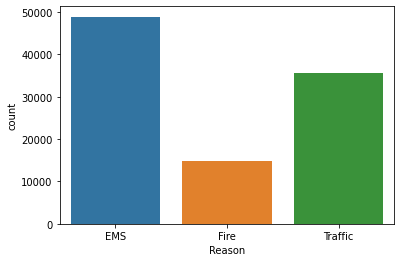

In [170]:
#Visulaization of 911 calls based on Reason
sns.countplot(x = 'Reason', data = df)

In [171]:
type(df['timeStamp'][0])

str

In [172]:
# Converting str to DateTime objects
df['timeStamp']= pd.to_datetime(df['timeStamp'])

In [173]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [174]:
type(df['timeStamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [175]:
time = df['timeStamp'].iloc[0]

In [176]:
time

Timestamp('2015-12-10 17:40:00')

In [177]:
#Creating 3 new columns called Hour, Month, and Day of Week
df['Hour']= df['timeStamp'].apply(lambda Hour: Hour.hour)
df['Month']= df['timeStamp'].apply(lambda Month: Month.month)
df['Day']= df['timeStamp'].apply(lambda Day: Day.dayofweek)


In [178]:
df['Hour']


0        17
1        17
2        17
3        17
4        17
         ..
99487    11
99488    11
99489    11
99490    11
99491    11
Name: Hour, Length: 99492, dtype: int64

In [179]:
df['Month']

0        12
1        12
2        12
3        12
4        12
         ..
99487     8
99488     8
99489     8
99490     8
99491     8
Name: Month, Length: 99492, dtype: int64

In [180]:
df['Day']

0        3
1        3
2        3
3        3
4        3
        ..
99487    2
99488    2
99489    2
99490    2
99491    2
Name: Day, Length: 99492, dtype: int64

In [181]:
dmap= {0: 'Mon', 1: 'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [182]:
df['Day']= df['Day'].map(dmap)

<AxesSubplot:xlabel='Day', ylabel='count'>

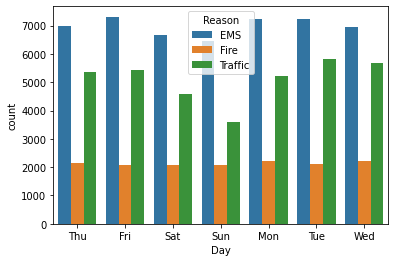

In [183]:
#Visualization
sns.countplot(x = df['Day'], data = df, hue = 'Reason')

<AxesSubplot:xlabel='Month', ylabel='count'>

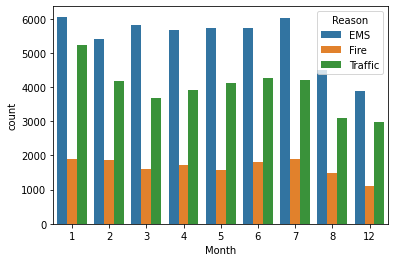

In [184]:
sns.countplot(x = df['Month'], data = df, hue = 'Reason')

In [185]:
byMonth=df.groupby(by = df['Month']).count().head()

In [186]:
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


<AxesSubplot:xlabel='Month'>

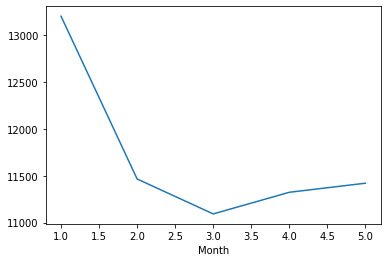

In [187]:
#Plotting the dataframe indicating the count of calls pm
byMonth['twp'].plot()

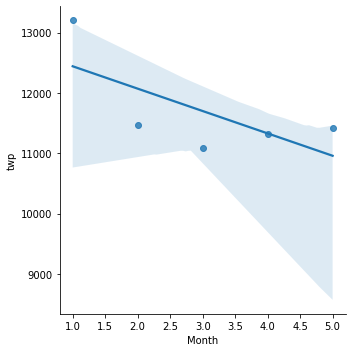

In [188]:
# creating a linear fit on the number of calls per month
sns.lmplot(x = 'Month', y = 'twp', data = byMonth.reset_index())

In [189]:
df['timeStamp']

0       2015-12-10 17:40:00
1       2015-12-10 17:40:00
2       2015-12-10 17:40:00
3       2015-12-10 17:40:01
4       2015-12-10 17:40:01
                ...        
99487   2016-08-24 11:06:00
99488   2016-08-24 11:07:02
99489   2016-08-24 11:12:00
99490   2016-08-24 11:17:01
99491   2016-08-24 11:17:02
Name: timeStamp, Length: 99492, dtype: datetime64[ns]

In [190]:
#Creating a new column 'date' from timeStamp: 
df['date'] = df['timeStamp'].apply(lambda t: t.date())

In [191]:
df['date']

0        2015-12-10
1        2015-12-10
2        2015-12-10
3        2015-12-10
4        2015-12-10
            ...    
99487    2016-08-24
99488    2016-08-24
99489    2016-08-24
99490    2016-08-24
99491    2016-08-24
Name: date, Length: 99492, dtype: object

In [192]:
byDate = df.groupby(by=df['date']).count()


In [193]:
byDate

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day
date,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-20,328,328,328,279,328,328,328,327,328,328,328,328,328
2016-08-21,357,357,357,299,357,357,357,352,357,357,357,357,357
2016-08-22,389,389,389,336,389,389,388,384,389,389,389,389,389


<AxesSubplot:xlabel='date'>

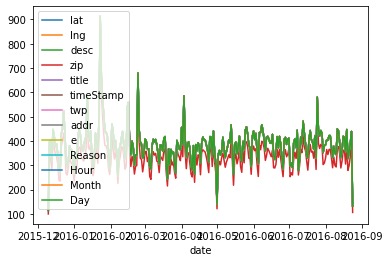

In [194]:
byDate.plot()

In [195]:
# Plotting the above graph based on Reason:
byDate.reset_index()

,date,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day
0,2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115
1,2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396
2,2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403
3,2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319
4,2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,2016-08-20,328,328,328,279,328,328,328,327,328,328,328,328,328
255,2016-08-21,357,357,357,299,357,357,357,352,357,357,357,357,357
256,2016-08-22,389,389,389,336,389,389,388,384,389,389,389,389,389
257,2016-08-23,439,439,439,390,439,439,439,437,439,439,439,439,439


In [196]:
date1 = byDate.reset_index()['date']

In [197]:
date1

0      2015-12-10
1      2015-12-11
2      2015-12-12
3      2015-12-13
4      2015-12-14
          ...    
254    2016-08-20
255    2016-08-21
256    2016-08-22
257    2016-08-23
258    2016-08-24
Name: date, Length: 259, dtype: object

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   lat        99492 non-null  float64       
 1   lng        99492 non-null  float64       
 2   desc       99492 non-null  object        
 3   zip        86637 non-null  float64       
 4   title      99492 non-null  object        
 5   timeStamp  99492 non-null  datetime64[ns]
 6   twp        99449 non-null  object        
 7   addr       98973 non-null  object        
 8   e          99492 non-null  int64         
 9   Reason     99492 non-null  object        
 10  Hour       99492 non-null  int64         
 11  Month      99492 non-null  int64         
 12  Day        99492 non-null  object        
 13  date       99492 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(7)
memory usage: 10.6+ MB


<AxesSubplot:xlabel='date'>

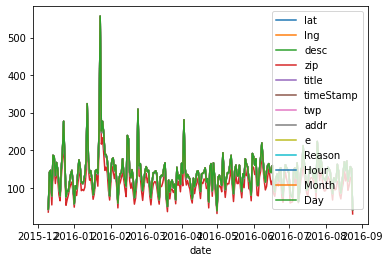

In [199]:
df[df['Reason']== 'Traffic'].groupby('date').count().plot()

<AxesSubplot:xlabel='date'>

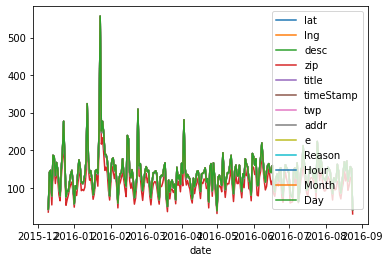

In [203]:
df[df['Reason']== 'Traffic'].groupby('date').count().plot()


<AxesSubplot:xlabel='date'>

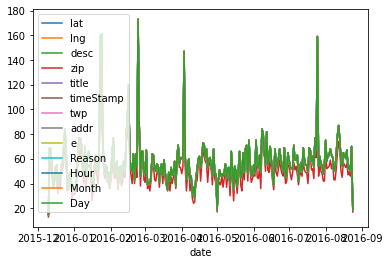

In [205]:
df[df['Reason'] == 'Fire'].groupby('date').count().plot()

<AxesSubplot:xlabel='date'>

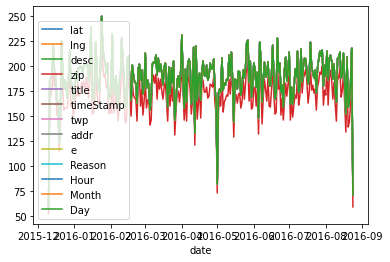

In [206]:
df[df['Reason'] == 'EMS'].groupby('date').count().plot()

In [213]:
#Restructuring the dataframe so that the columns become the Hours and the Index becomes the Day of the Week
dayHours= df.groupby(['Day', 'Hour']).count().unstack()

In [215]:
dayHours.head()

lat                                               ... date             \
Hour   0    1    2    3    4    5    6    7    8    9   ...   14   15    16   
Day                                                     ...                   
Fri   275  235  191  175  201  194  372  598  742  752  ...  932  980  1039   
Mon   282  221  201  194  204  267  397  653  819  786  ...  869  913   989   
Sat   375  301  263  260  224  231  257  391  459  640  ...  789  796   848   
Sun   383  306  286  268  242  240  300  402  483  620  ...  684  691   663   
Thu   278  202  233  159  182  203  362  570  777  828  ...  876  969   935   

                                          
Hour    17   18   19   20   21   22   23  
Day                                       
Fri    980  820  696  667  559  514  474  
Mon    997  885  746  613  497  472  325  
Sat    757  778  696  628  572  506  467  
Sun    714  670  655  537  461  415  330  
Thu   1013  810  698  617  553  424  354  

[5 rows x 288 columns]

<AxesSubplot:xlabel='None-Hour', ylabel='Day'>

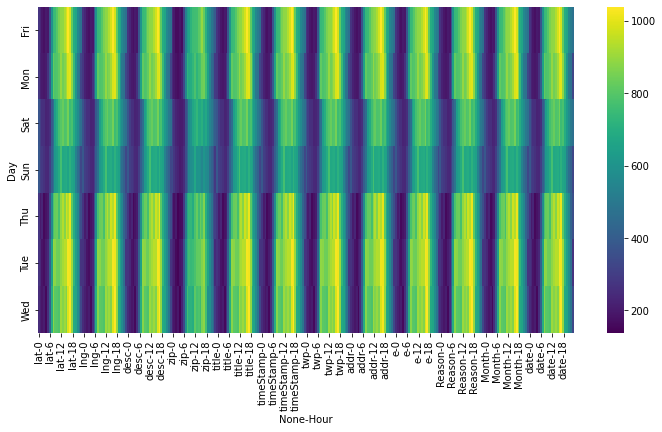

In [220]:
# Creating a heatmap using this Dataframe
plt.figure(figsize = (12,6))
sns.heatmap(data = dayHours, cmap = 'viridis')

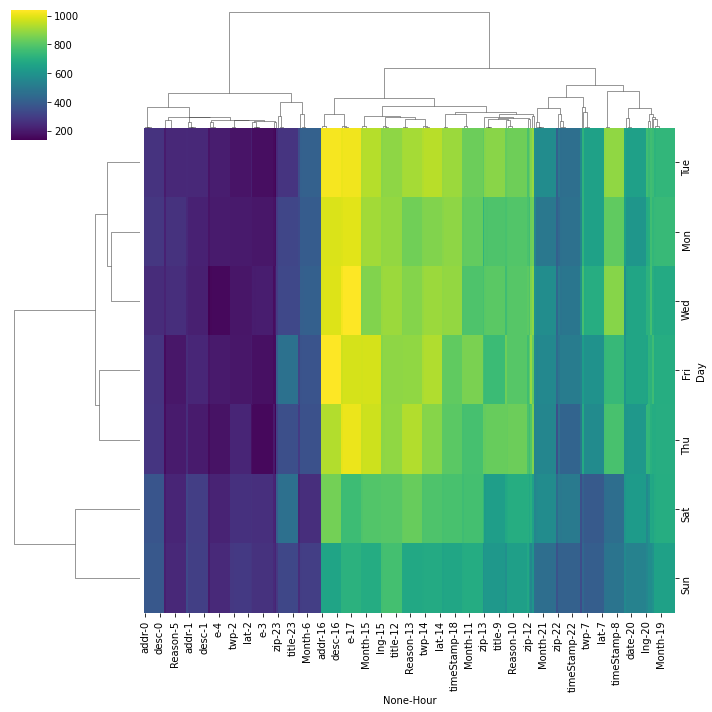

In [222]:
sns.clustermap(dayHours,cmap='viridis')

In [224]:
#Restructuring the dataframe so that the columns become the Hours and the Index becomes the Day of the Week
dayMonth= df.groupby(['Day', 'Month']).count().unstack()

In [225]:
dayMonth

lat                                                   lng  ...  Hour  \
Month    1     2     3     4     5     6     7     8     12    1   ...    12   
Day                                                                ...         
Fri    1970  1581  1525  1958  1730  1649  2045  1310  1065  1970  ...  1065   
Mon    1727  1964  1535  1598  1779  1617  1692  1511  1257  1727  ...  1257   
Sat    2291  1441  1266  1734  1444  1388  1695  1099   978  2291  ...   978   
Sun    1960  1229  1102  1488  1424  1333  1672  1021   907  1960  ...   907   
Thu    1584  1596  1900  1601  1590  2065  1646  1230  1266  1584  ...  1266   
Tue    1973  1753  1884  1430  1918  1676  1670  1612  1234  1973  ...  1234   
Wed    1700  1903  1889  1517  1538  2058  1717  1295  1262  1700  ...  1262   

       date                                                  
Month    1     2     3     4     5     6     7     8     12  
Day                                                          
Fri    1970  1581  1525  1958  1730  1649  2045  1310  1065  
Mon    1727  1964  1535  1598  1779  1617  1692  1511  1257  
Sat    2291  1441  1266  1734  1444  1388  1695  1099   978  
Sun    1960  1229  1102  1488  1424  1333  1672  1021   907  
Thu    1584  1596  1900  1601  1590  2065  1646  1230  1266  
Tue    1973  1753  1884  1430  1918  1676  1670  1612  1234  
Wed    1700  1903  1889  1517  1538  2058  1717  1295  1262  

[7 rows x 108 columns]

<AxesSubplot:xlabel='None-Month', ylabel='Day'>

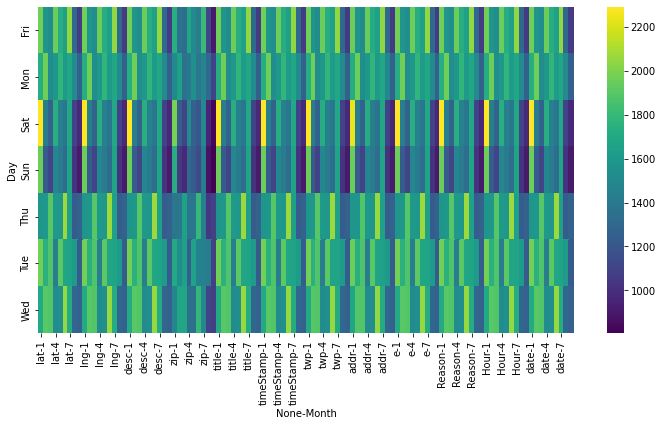

In [226]:
# Creating a heatmap using this Dataframe
plt.figure(figsize = (12,6))
sns.heatmap(data = dayMonth, cmap = 'viridis')

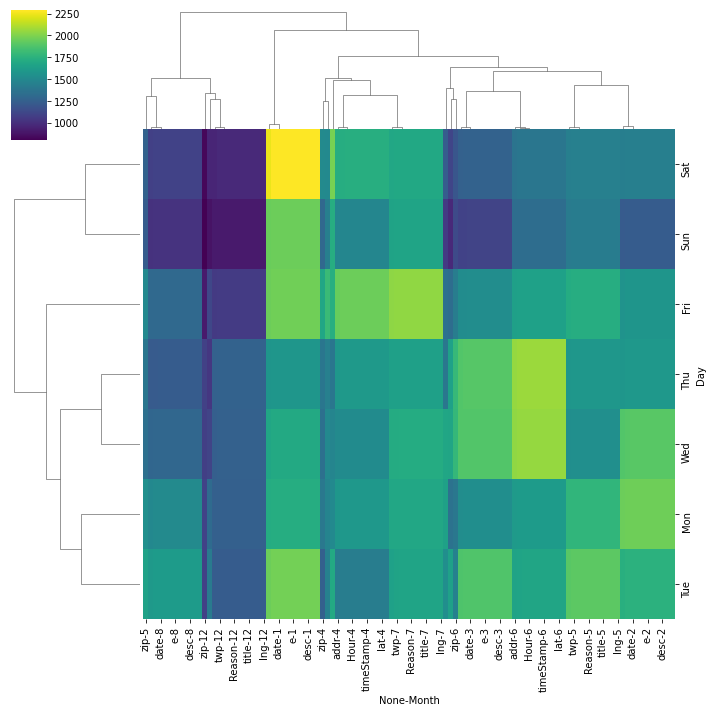

In [227]:
sns.clustermap(dayMonth,cmap='viridis')